# 5-3. 다양한 시각화 라이브러리

## 강의 소개

이번 강의에서는 matplotlib, seaborn이외에 Missingno, Treemap, Waffle chart, Venn에 대해 알아보겠습니다.

데이터를 다루면서 가장 고민거리인 결측치! 데이터 클렌징 작업에서 자주 사용될 수 있는 유용한 코드를 연습해보겠습니다.

또한 상황에 따라 큰 인사이트를 줄 수 있는 직관적인 시각화를 원한다면? Treemap, Waffle chart, Venn이 필요할 수 있습니다.

다양한 그래프를 살펴보고 이후 어떻게 응용할 수 있을지 고민해보아요

## Further Reading

- [missingno](https://github.com/ResidentMario/missingno)
- [squarify](https://github.com/laserson/squarify)
- [History of Treeviews](http://www.cs.umd.edu/hcil/treemap-history/index.shtml)
- [PyWaffle](https://pywaffle.readthedocs.io/en/latest/)
- [pyvenn](https://github.com/tctianchi/pyvenn)

## Further Questions

상황에 맞는 시각화 라이브러리를 선택하는 것은 매우 중요한데요,

다음 상황에서 이번 강의에서 다룬 4가지 시각화 라이브러리 중에서 어떤 라이브러리를 사용하면 좋을지 고민해봅시다.

1. Subinium은 운동을 사랑하는 건장한 청년입니다. 건강한 몸을 만들기 위해 자신이 먹을 음식의 영양성분을 알아보고자 합니다. 탄수화물, 지방, 그리고 단백질의 비율을 파악하고자 하는데, 탄수화물 안에는 당질, 식이섬유 등 다양한 종류의 탄수화물이 있습니다. 이러한 계층적인 영양성분 정보를 한눈에 파악하여 섭취해도 되는 음식인지 아닌지를 쉽게 파악하고 싶습니다.

2. Dijkstra는 암스테르담에 꽃이 종류별로 연간 몇송이가 있는지 알아보고자 합니다. 그런데 일부 조사자의 업무 태만으로 인해 몇몇 데이터에 결측치가 존재합니다. Dijkstra는 얼마나 많은 결측치가 있는지, 결측치의 분포는 어떻게 되는지 한눈에 확인하고 싶습니다.

3. Turing이 다니는 Enigma 대학교에서는 이번 학기에 확률론, 선형대수, 그리고 수리통계학, 총 3가지 과목이 개설되었습니다. 가능한 모든 경우의 수에 대해 각 case별 학생들의 분포를 알아보기 위해 시각화를 진행하고자 합니다.

4. Beetea는 민트초코를 굉장히 싫어합니다. 자신과 같은 의견을 가진 사람들이 얼마나 있는지 천 명을 대상으로 표본조사를 진행하였고 475명이 민초파, 465명이 반민초파, 60명이 응답을 하지 않았습니다. 이 사실을 모두에게 알리기 위해 조사 결과를 특별한 방법으로 시각화 하고자 합니다.

## 0. 라이브러리 다운로드 및 버전 확인

In [3]:
!python --version

Python 3.7.12


In [4]:
%pip install --upgrade pip

     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [8]:
%pip install missingno squarify pywaffle matplotlib_venn

In [10]:
import missingno as msno
import squarify
import pywaffle
import matplotlib_venn

print('missingno ver', msno.__version__)
#print('squarify ver', squarify.__version__)
#print('pywaffle ver', pywaffle.__version__)
print('matplotlib_venn ver', matplotlib_venn.__version__)

missingno ver 0.5.0
matplotlib_venn ver 0.11.6


In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 1. MissingNo

### 1-1. Titanic Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/boostcamp/04_U-stage/000_Data Viz/00_data

/content/drive/MyDrive/boostcamp/04_U-stage/000_Data Viz/00_data


In [12]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 1-2. missingno 

- [ResidentMario/missingno](https://github.com/ResidentMario/missingno/blob/master/CONFIGURATION.md)

In [14]:
import missingno as msno

`missingno`는 결측치를 matrix로 나타내어 흰 부분으로 표시합니다.

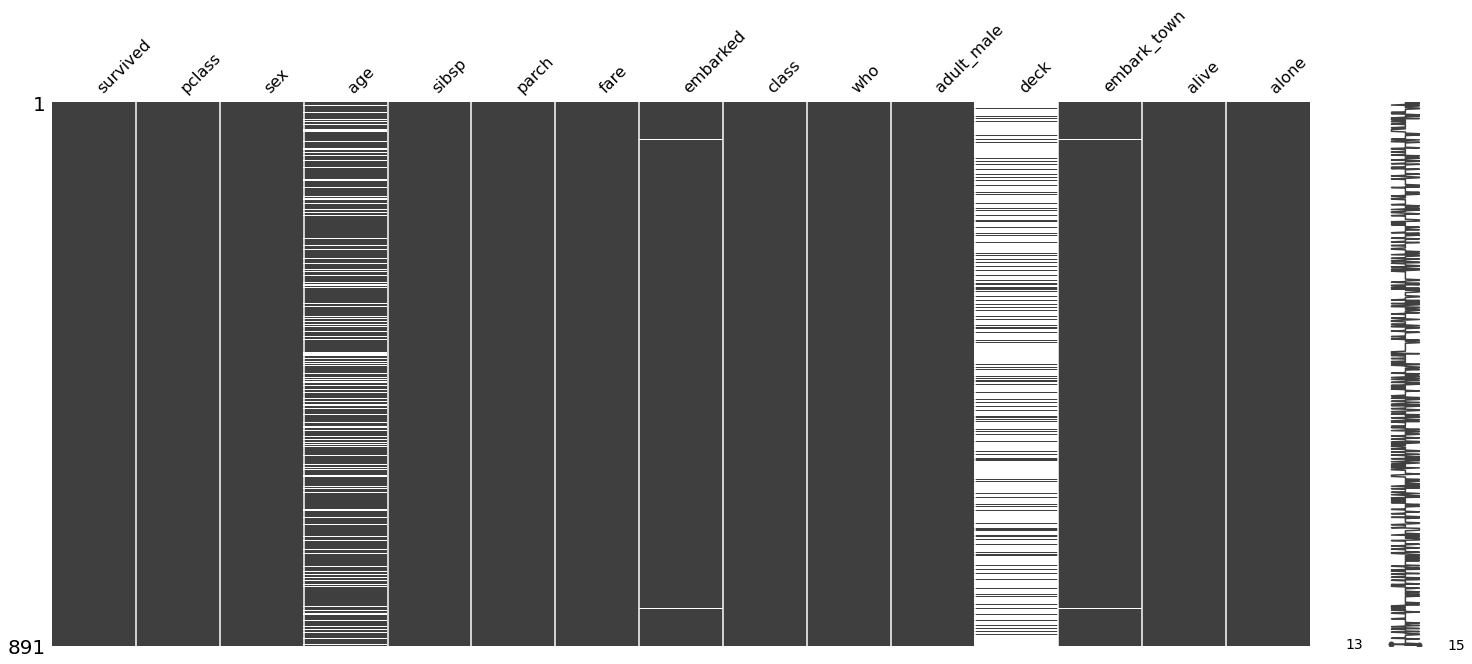

In [15]:
msno.matrix(titanic)

row당 결측치의 개수가 다르기 때문에 다음과 같이 정렬을 진행할 수 있습니다.

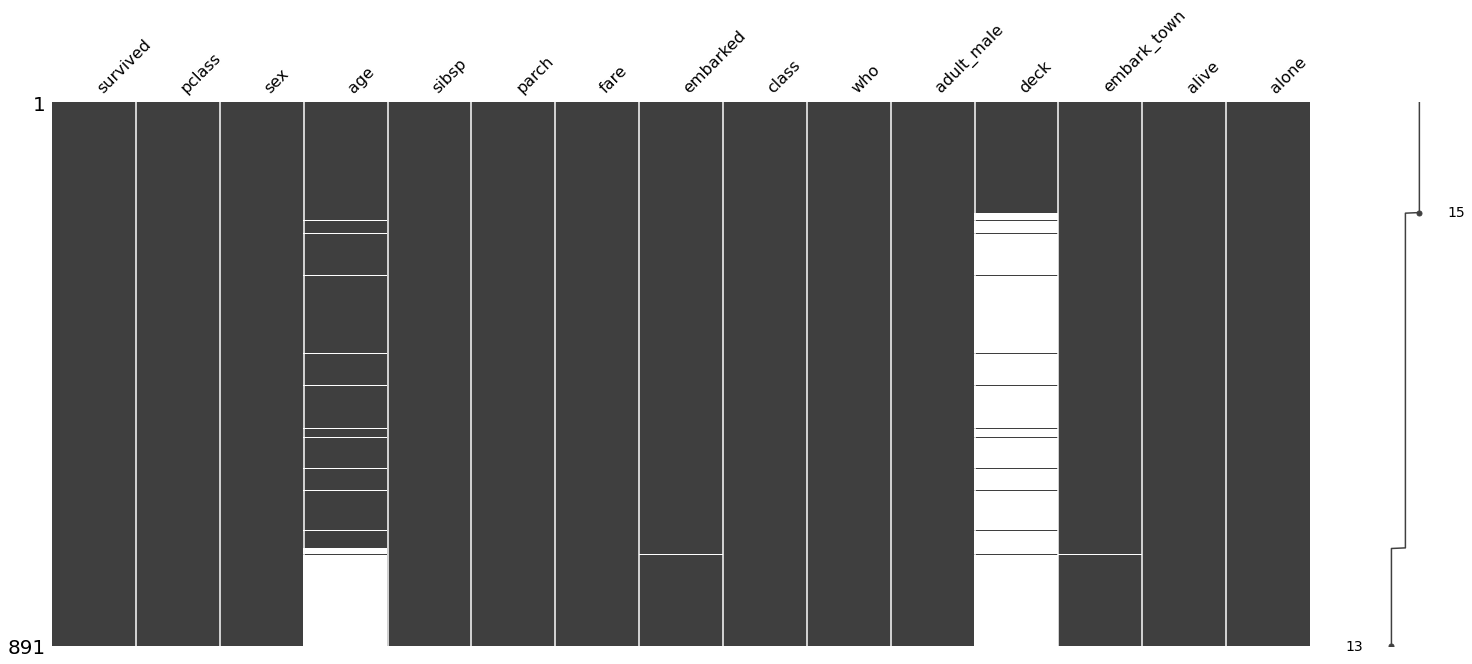

In [16]:
msno.matrix(titanic, 
            sort='descending', # ascending
           ) 

위의 방법 외에는 개수를 직접적으로 bar chart를 그려주는 방법이 있습니다.

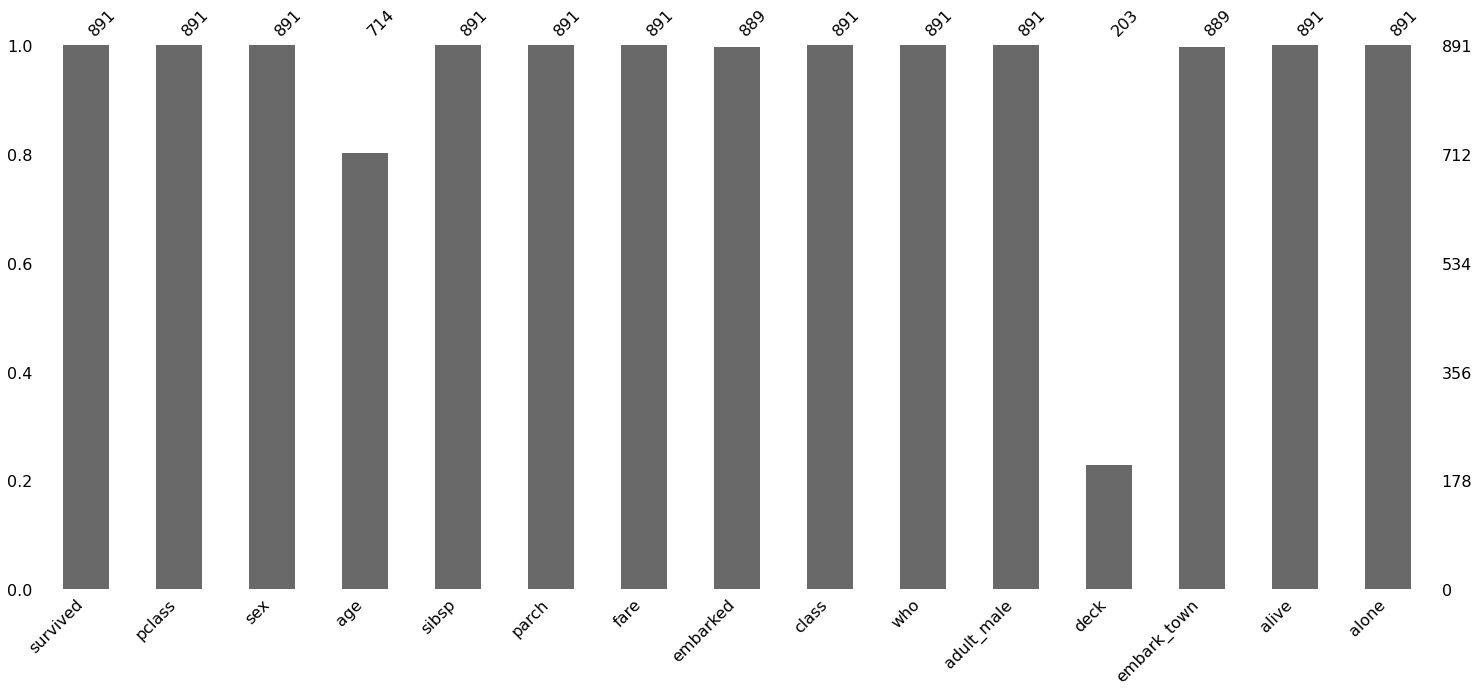

In [17]:
msno.bar(titanic)

## 2. Treemap

- [laserson/squarify](https://github.com/laserson/squarify)

계층을 표현하기 위한 트리맵은 `plotly`에서 더 자세하게 사용할 수 있습니다. 

In [18]:
import squarify

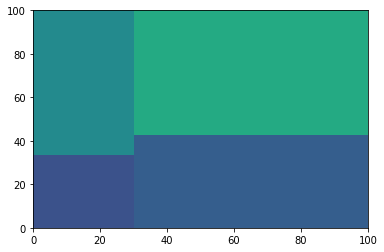

In [19]:
values = [100, 200, 300, 400]
squarify.plot(values)

- `label` : 텍스트 라벨을 달아줍니다. (Pie차트와 유사)

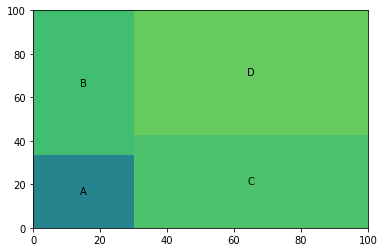

In [20]:
values = [100, 200, 300, 400]
label = list('ABCD')
squarify.plot(values, label=label)

- `color` : 색을 개별적으로 지정 가능 (기본은 랜덤)

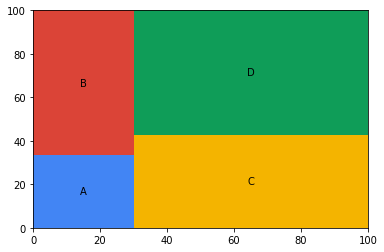

In [24]:
values = [100, 200, 300, 400]
label = list('ABCD')
color = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58']

squarify.plot(values, label=label, color=color)

- `pad` 
  - 각 사각형 사이의 간격 조정

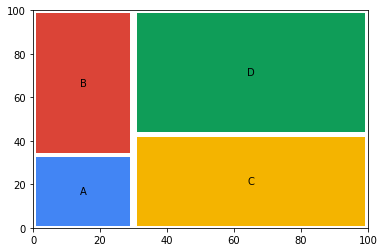

In [22]:
values = [100, 200, 300, 400]
label = list('ABCD')
color = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58']

squarify.plot(values, label=label, color=color, pad=0.2)

- `text_kwargs` : 텍스트 요소를 딕셔너리로 전달

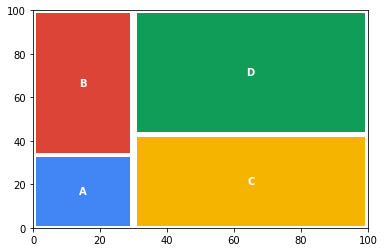

In [23]:
values = [100, 200, 300, 400]
label = list('ABCD')
color = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58']

squarify.plot(values, label=label, color=color, pad=0.2,
             text_kwargs={'color':'white', 'weight':'bold'}
             )

matplotlib 문법으로 깔끔하게 마무리.

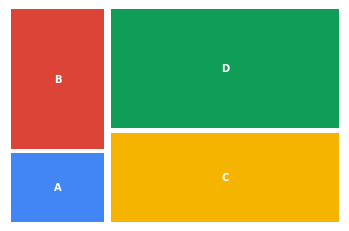

In [25]:
fig, ax = plt.subplots()
values = [100, 200, 300, 400]
label = list('ABCD')
color = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58']

squarify.plot(values, label=label, color=color, pad=0.2, 
               text_kwargs={'color':'white', 'weight':'bold'}, ax=ax)

ax.axis('off') # axis 제거
plt.show()

## 3. Waffle Chart 

-[gyli/PyWaffle](https://github.com/gyli/PyWaffle)

### 3-1. 기본 Waffle

- `rows`와 `coloums`로 사각형의 전체 형태를 지정할 수 있습니다. 
- `values`로 값 전달

In [26]:
from pywaffle import Waffle

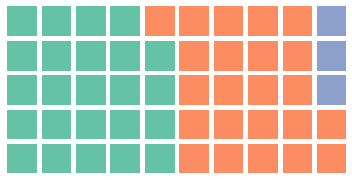

In [27]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=[48, 46, 6],
    figsize=(5, 3)
)
plt.show()

### 3-2. legend

- legend는 딕셔너리로 전달합니다. 우측 상단 또는 중앙 하단을 추천합니다.

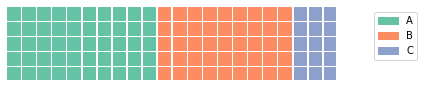

In [28]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

### 3-3. Color

- `cmap_name` : 컬러맵을 전달해서 색을 변경할 수 있습니다.

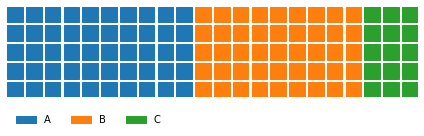

In [29]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    cmap_name='tab10', #
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
)

plt.show()

- `colors` : 각 범주의 색을 전달할 수도 있습니다.

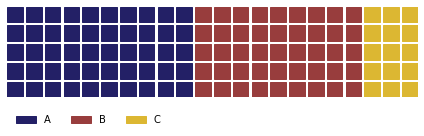

In [30]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=["#232066", "#983D3D", "#DCB732"], # 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
)

plt.show()

### 3-5. Block Arraging Style

- `starting_location` : 네 꼭지점을 기준으로 시작점을 잡을 수 있습니다.
  - `NW`: North West, 왼쪽 위
  - `SW`: South West, 왼쪽 아래
  - `NE`: North East, 오른쪽 위
  - `SE`: South East, 오른쪽 아래

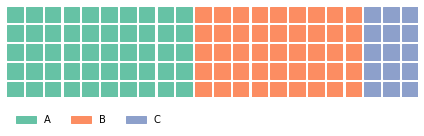

In [32]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW' # NW, SW, NE and SE
)

plt.show()

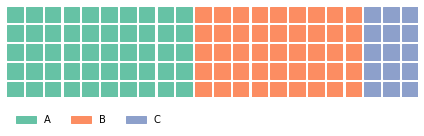

In [33]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='SW' # NW, SW, NE and SE
)

plt.show()

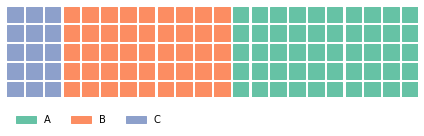

In [34]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='NE' # NW, SW, NE and SE
)

plt.show()

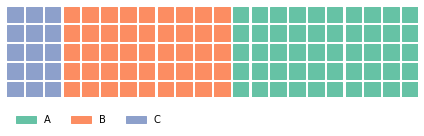

In [31]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='SE' # NW, SW, NE and SE
)

plt.show()

- `vertical` : 기본적으로는 가로로 진행합니다. 세로로 진행하고 싶다면 True를 전달하면 됩니다.

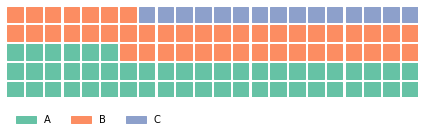

In [35]:
data = {'A': 50, 'B': 45, 'C': 15}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    vertical=True
)

plt.show()

- `block_arranging_style` : 어떤 식으로 나열 할지 정할 수 있습니다. 기본은 snake 방식입니다.

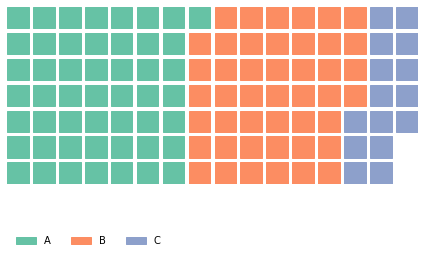

In [37]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    block_arranging_style= 'snake',
)


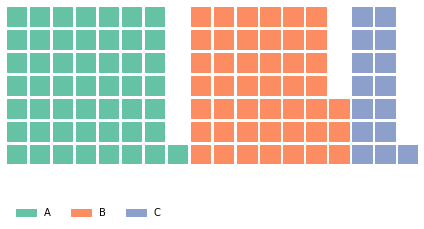

In [36]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    block_arranging_style= 'new-line',
)


### 3-6. Icon

[Font Awesome](https://fontawesome.com/)의 아이콘을 사용할 수 있습니다.

- `icons` : 아이콘 명칭
- `icon_legend` : 아이콘을 범례로 사용할 것인가
- `font_size` : 아이콘 사이즈

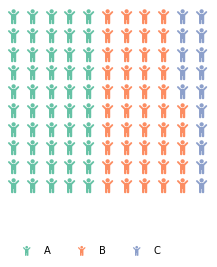

In [38]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,     
    values=data, 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    icons='child',
    icon_legend=True,
    font_size=15,
)
plt.show()

## 4. Venn

- [konstantint/matplotlib-venn](https://github.com/konstantint/matplotlib-venn)

### 4-1. 2개의 Subset

이진법을 사용하여 각각에 들어갈 값을 정할 수 있습니다.

- 01 : 1번째 Set에 들어갈 내용
- 10 : 2번째 Set에 들어갈 내용
- 11 : 교집합에 들어갈 내용

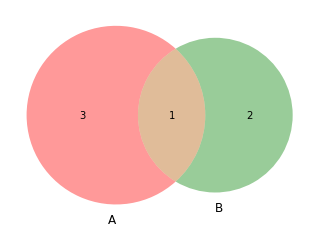

In [39]:
from matplotlib_venn import venn2
venn2(subsets = (3, 2, 1))

### 4-2. 3개의 서브셋

- 1개만 포함되는 인덱스
    - 1 : 001
    - 2 : 010
    - 4 : 100
- 2개가 포함되는 인덱스
    - 3 : 011
    - 5 : 101
    - 6 : 110
- 3개가 포함되는 인덱스
    - 7 : 111

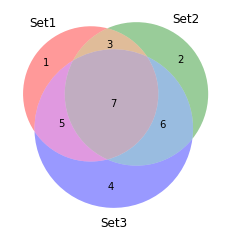

In [40]:
from matplotlib_venn import venn3
venn3(subsets = (1, 2, 3, 4, 5, 6, 7), set_labels = ('Set1', 'Set2', 'Set3'))

### 4-3. Set으로 전달하기

set을 전달하면 자동적으로 counting 하여 표현해줍니다.

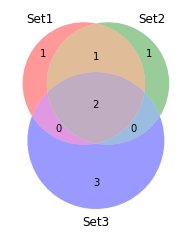

In [41]:
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()